In [1]:
from keras.datasets import fashion_mnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print('Training data shape: ', train_X.shape, train_Y.shape)

print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


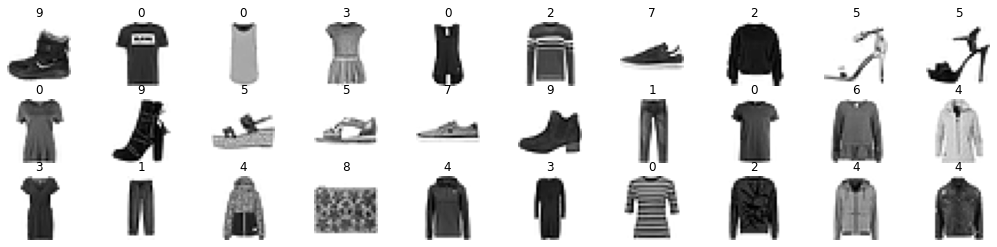

In [5]:
_, axes = plt.subplots(nrows=3, ncols=10, figsize=(18, 4))
for ax, image, label in zip(axes.flatten(), train_X, train_Y):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r)
    ax.set_title(label)

![](../example/fashion_mnist.png)

* 0 - t-shirt/top 
* 1 - trousers
* 2 - pullover
* 3 - dress
* 4 - coat
* 5 - sandal
* 6 - shirt
* 7 - sneaker
* 8 - bag
* 9 - ankle boot


In [6]:
#convert 2d input to 3d
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
print(f'Training data range: from {train_X.min()} to {train_X.max()}')

print(f'Testing data range: from {test_X.min()} to {test_X.max()}')

Training data range: from 0 to 255
Testing data range: from 0 to 255


In [8]:
#type converting and scaling to 0-1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [9]:
print(f'Training data range: from {train_X.min()} to {train_X.max()}')

print(f'Testing data range: from {test_X.min()} to {test_X.max()}')

Training data range: from 0.0 to 1.0
Testing data range: from 0.0 to 1.0


In [10]:
# Change the labels from categorical to OHE
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

train_Y_one_hot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape, valid_X.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

Архитектура сети:

* три сверточных слоя, с 32 фильтрами 3х3, с 64 фильтрами 3х3 и с 128 фильтрами 3х3
* после каждого сверточного слоя пулинг с ядром 2х2
* полносвязный слой с 128 нейронами

In [12]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [17]:
train_history = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 31s 40ms/step - loss: 0.4677 - accuracy: 0.8291 - val_loss: 0.3319 - val_accuracy: 0.8797
Epoch 2/20
750/750 [==============================] - 30s 40ms/step - loss: 0.2912 - accuracy: 0.8933 - val_loss: 0.2717 - val_accuracy: 0.9030
Epoch 3/20
750/750 [==============================] - 30s 40ms/step - loss: 0.2425 - accuracy: 0.9118 - val_loss: 0.2515 - val_accuracy: 0.9090
Epoch 4/20
750/750 [==============================] - 30s 40ms/step - loss: 0.2114 - accuracy: 0.9221 - val_loss: 0.2490 - val_accuracy: 0.9061
Epoch 5/20
750/750 [==============================] - 30s 40ms/step - loss: 0.1840 - accuracy: 0.9324 - val_loss: 0.2222 - val_accuracy: 0.9223
Epoch 6/20
750/750 [==============================] - 30s 40ms/step - loss: 0.1637 - accuracy: 0.9388 - val_loss: 0.2319 - val_accuracy: 0.9205
Epoch 7/20
750/750 [==============================] - 30s 40ms/step - loss: 0.1429 - accuracy: 0.9465 - val_loss: 0.2638 - val_accuracy:

Здесь наблюдается достаточно большая разница между training accuracy и validation accuracy, может иметь место переобучение. В пользу этого говорить и разница в значении функции потерь (loss), так как она минимальная (почти нулевая) на обучающем наборе, но в ~20 раз больше при валидации.

Проверим модель на тесовом наборе.

In [18]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4744776487350464
Test accuracy: 0.9136000275611877


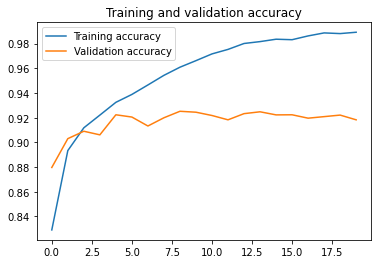

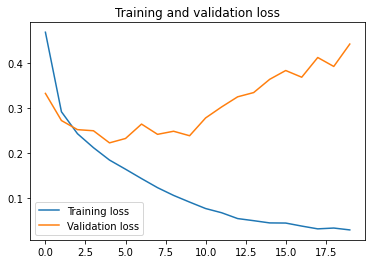

In [27]:
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Здесь мы можем видеть, что val_accuracy после 5-ой эпохи практически не изменялась. Validation loss после 10-ой эпохи только рос.

Для минимизации переобучения добавим dropout в архитектуру сети.

На первых двух макс-пуллингах сделаем дропаут с вероятностью *0.25*, на третьем с *0.4*, на полносвязном слое с вероятностью *0.3*.

In [32]:
batch_size = 64
epochs = 20
num_classes = 10

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [35]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [36]:
train_history_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 35s 46ms/step - loss: 0.6039 - accuracy: 0.7750 - val_loss: 0.3820 - val_accuracy: 0.8575
Epoch 2/20
750/750 [==============================] - 36s 48ms/step - loss: 0.3769 - accuracy: 0.8602 - val_loss: 0.3045 - val_accuracy: 0.8888
Epoch 3/20
750/750 [==============================] - 36s 48ms/step - loss: 0.3280 - accuracy: 0.8786 - val_loss: 0.2835 - val_accuracy: 0.8937
Epoch 4/20
750/750 [==============================] - 36s 48ms/step - loss: 0.3029 - accuracy: 0.8870 - val_loss: 0.2698 - val_accuracy: 0.8997
Epoch 5/20
750/750 [==============================] - 34s 45ms/step - loss: 0.2816 - accuracy: 0.8974 - val_loss: 0.2677 - val_accuracy: 0.9024
Epoch 6/20
750/750 [==============================] - 35s 46ms/step - loss: 0.2693 - accuracy: 0.9005 - val_loss: 0.2430 - val_accuracy: 0.9106
Epoch 7/20
750/750 [==============================] - 34s 45ms/step - loss: 0.2593 - accuracy: 0.9044 - val_loss: 0.2333 - val_accuracy:

In [38]:
model.save("fashion_mnist_model_dropout")

INFO:tensorflow:Assets written to: fashion_mnist_model_dropout\assets


INFO:tensorflow:Assets written to: fashion_mnist_model_dropout\assets


In [40]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2172 - accuracy: 0.9205
Test loss: 0.2172398865222931
Test accuracy: 0.9204999804496765


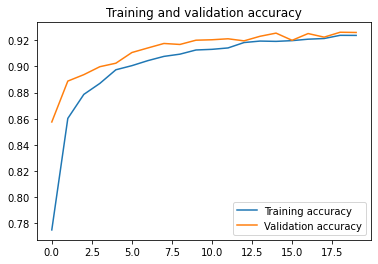

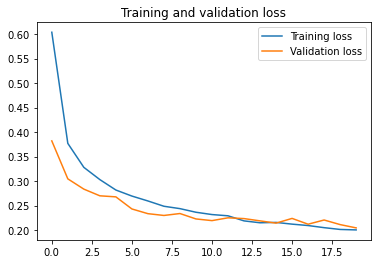

In [41]:
accuracy = train_history_dropout.history['accuracy']
val_accuracy = train_history_dropout.history['val_accuracy']
loss = train_history_dropout.history['loss']
val_loss = train_history_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Теперь такого расхождения в метриках на тренировочном и валидационном наборе не наблюдается

In [57]:
predicted_classes = model.predict(test_X)
predicted_classes

313/313 [==============================] - 2s 7ms/step


array([[2.4966458e-11, 8.2164657e-12, 2.8905198e-11, ..., 5.9561007e-05,
        1.7992365e-12, 9.9992990e-01],
       [9.1888246e-08, 7.7772911e-18, 9.9999738e-01, ..., 2.5231235e-20,
        2.3313402e-17, 4.5915720e-19],
       [7.0011874e-14, 1.0000000e+00, 3.9554970e-16, ..., 5.7324723e-23,
        1.6814878e-17, 6.1931959e-24],
       ...,
       [2.3592397e-11, 8.0076170e-18, 7.8188627e-12, ..., 3.4801437e-16,
        1.0000000e+00, 5.5543000e-16],
       [1.5906361e-08, 1.0000000e+00, 1.4934110e-10, ..., 1.2558999e-14,
        3.0677390e-12, 4.2346883e-15],
       [7.0922880e-08, 9.8039604e-11, 1.0170706e-08, ..., 2.1243656e-02,
        1.3608034e-05, 7.9488509e-06]], dtype=float32)

In [58]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes)
print(test_Y)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


Found 9147 correct labels


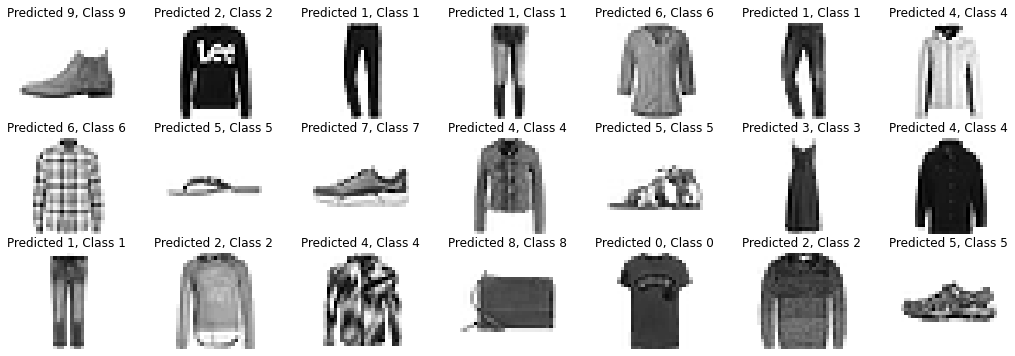

In [64]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(18, 6))
for ax, image, true_class, pred in zip(axes.flatten(), test_X[correct], test_Y[correct], predicted_classes[correct]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r)
    ax.set_title("Predicted {}, Class {}".format(pred, true_class))

Found 853 incorrect labels


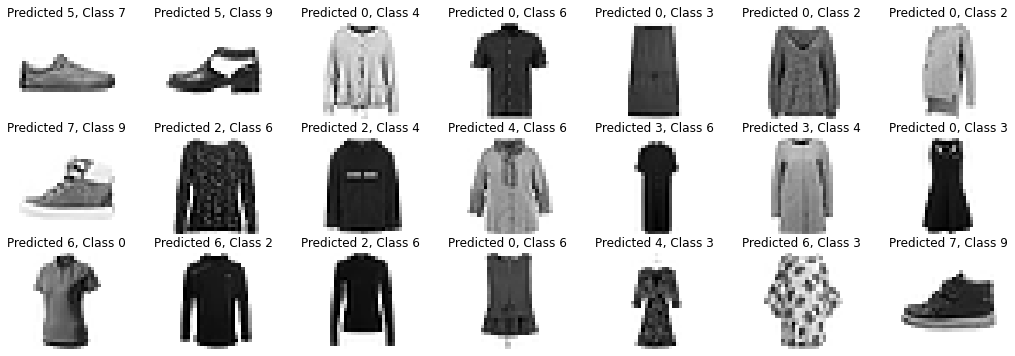

In [65]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(18, 6))
for ax, image, true_class, pred in zip(axes.flatten(), test_X[incorrect], test_Y[incorrect], predicted_classes[incorrect]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r)
    ax.set_title("Predicted {}, Class {}".format(pred, true_class))

Если обратиться к толкованию номеров классов, то мы видим, что все ошибки логически обоснованы. 



In [66]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.74      0.92      0.82      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.88      0.88      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.87      0.87      0.87      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.82      0.68      0.74      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



Из отчета о классификации мы видим, что у 6-го класса проседает recall, то есть много false negative определенных объектов. У 0-го класа ниже precision, то есть много false positive классификаций. Это может быть вызвано неоднозначностью маркировки у классов 0, 2, 6 (t-shirt/top, pullover, shirt): визуально очень похожие объекты маркированы как разные классы.

